<a href="https://colab.research.google.com/github/Rishu-N/COMPUTER-VISION/blob/main/1_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer

## DATA PREPERATION

In [38]:
dataset, dataset_info = tfds.load("malaria",
                                  with_info=True, as_supervised=True,shuffle_files=True, split=["train"])

In [39]:
def splits(dataset, TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = dataset.skip(int((TRAIN_RATIO+VAL_RATIO)*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset


In [56]:
TRAIN_RATIO=0.6
TEST_RATIO=0.3
VAL_RATIO=0.1

#dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [57]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [58]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

## DATA VISUALIZATION

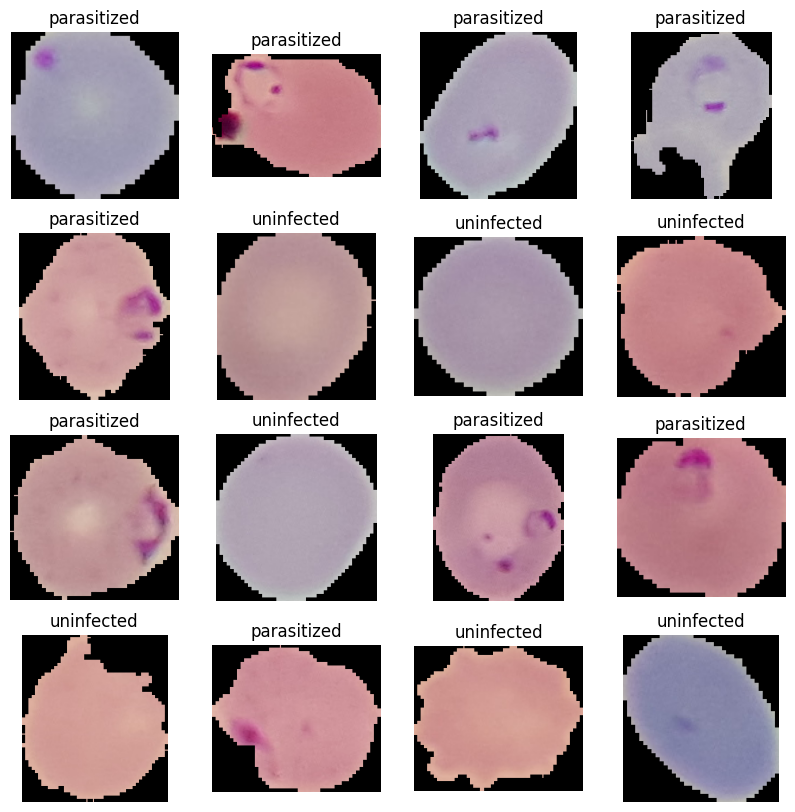

In [59]:
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis("off")

##Data Preprocessing

###Resizing + Normalization

In [60]:
IM_SIZE=224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255,label

In [61]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)

In [62]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [63]:
BATCH_SIZE=32
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

##MODEL CREATION


In [68]:

model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16, kernel_size = 3, strides = 1, padding = "valid", activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(100,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(100,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(10,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    Dense(1,activation="sigmoid"),
])

model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [69]:
y_true = [0,1,0,0]
y_pred = [0,1,0,0.]

bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true,y_pred))

y_true = [0,1,0,0]
y_pred = [0.1,0.9,0,0.1]

bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true,y_pred))

y_true = [0,1,0,0]
y_pred = [0.1,0.9,0,0.1]

bce = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.1)
print(bce(y_true,y_pred))

y_true = [0,1,0,0]
y_pred = [1,1,1,0.9]

bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true,y_pred))

tf.Tensor(-0.0, shape=(), dtype=float32)
tf.Tensor(0.07902031, shape=(), dtype=float32)
tf.Tensor(0.35422808, shape=(), dtype=float32)
tf.Tensor(8.242266, shape=(), dtype=float32)


In [72]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy()
)

In [73]:
history_1 = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
517/517 [==============================] - 39s 69ms/step - loss: 0.1937 - binary_accuracy: 0.9347 - val_loss: 0.4607 - val_binary_accuracy: 0.9183
Epoch 2/100
517/517 [==============================] - 35s 68ms/step - loss: 0.1640 - binary_accuracy: 0.9468 - val_loss: 0.3379 - val_binary_accuracy: 0.9034
Epoch 3/100
517/517 [==============================] - 36s 70ms/step - loss: 0.1449 - binary_accuracy: 0.9542 - val_loss: 0.3474 - val_binary_accuracy: 0.9260
Epoch 4/100
517/517 [==============================] - 36s 69ms/step - loss: 0.1336 - binary_accuracy: 0.9558 - val_loss: 0.1647 - val_binary_accuracy: 0.9434
Epoch 5/100
517/517 [==============================] - 35s 69ms/step - loss: 0.1283 - binary_accuracy: 0.9578 - val_loss: 0.2056 - val_binary_accuracy: 0.9434
Epoch 6/100
517/517 [==============================] - 44s 85ms/step - loss: 0.1224 - binary_accuracy: 0.9576 - val_loss: 0.3135 - val_binary_accuracy: 0.9227
Epoch 7/100
517/517 [=========================